# Фуриеова трансформација во дискретно време

ФТДВ е периодична функција која што се добива од даден сигнал. Обичната ДФТ дава примероци од ФТДВ на одредено растојание. Ако сигналот се надополни со нули тогаш ДФТ дава повеќе примероци од ФТДВ

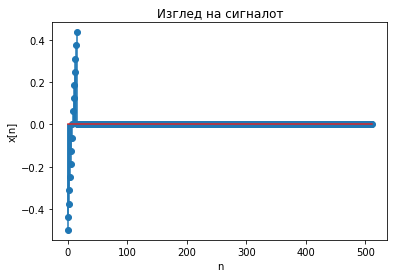

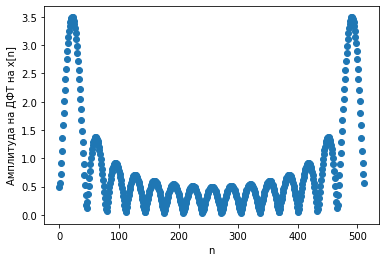

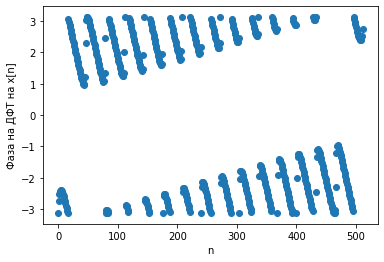

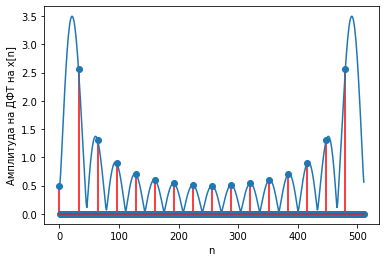

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#import math
import cmath
from scipy.fft import fft, ifft # gi zema samo ovie dve funkcii od bibliotekata


N = 512  # Должина на низата
n=np.asarray(list(range(0,N)))
#Omega = 2.0 * np.pi / 10
#Fi = 0
#M = N // 32
M = 16
x = np.zeros(N)
for i in range(M):
    x[i] = (i - M / 2) / M
DFT = fft(x)  
#print(DFT)
# Пресметувањето на фаза не може да се направи на цел вектор одеднаш 
# и мора да оди член по член
Faza = np.zeros(N)
for i in range(N):
    Faza[i] = cmath.phase(DFT[i])
    
plt.figure() # нова слика
plt.stem(n,x, use_line_collection = True)  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Изглед на сигналот')
plt.show()
    
    
plt.figure() # нова слика
plt.scatter(n,abs(DFT))  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('Амплитуда на ДФТ на x[n]')
plt.show()

plt.scatter(n, Faza)#, use_line_collection = True)
plt.xlabel('n')
plt.ylabel('Фаза на ДФТ на x[n]')
plt.show()

#   Пократка низа за КолкуПати  
KolkuPati = 32

N1 = N // KolkuPati  # Должина на низата
n1=np.asarray(list(range(0,N)))
M = 16
x1 = np.zeros(N1)
for i in range(M):
    x1[i] = (i - M / 2) / M
DFT1 = fft(x1)  
#print(DFT)
# Пресметувањето на фаза не може да се направи на цел вектор одеднаш 
# и мора да оди член по член
Amplituda1 = np.zeros(N)
for i in range(N1):
    Amplituda1[KolkuPati * i] = abs(DFT1[i])
    
plt.figure() # нова слика
plt.plot(n,abs(DFT))  # abs(Niza) дава низа од апсолутни вредности
plt.stem(n,Amplituda1, "ro", use_line_collection = True)  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('Амплитуда на ДФТ на x[n]')
plt.show()



# Модулација

Модулацијата е постапка на множење на сигналот со синусен (косинусен) сигнал кој се вика носител. Името доаѓа од тоа што како тој да го "носи" посакуваниот сигнал. Поинаку погледнато тоа просто значи поместување на спектарот на обичниот сигнал во околина на фреквенцијата на носителот. Во овој пример се зема сигнал со спектар кој што е ограничен до некоја фреквенција, со задавање на спектарот, а потоа со инверзна ДФТ се добива сигналот. Модулацијата и демодулацијата се прават потоа.

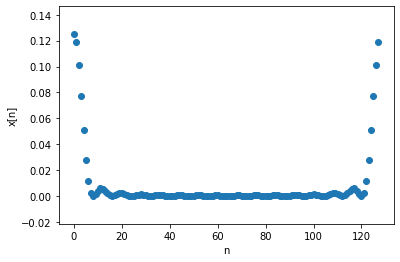

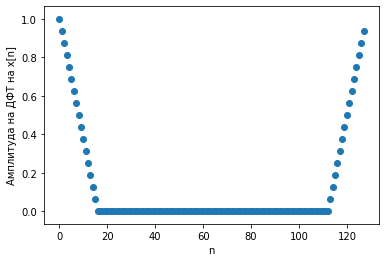

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: ComplexWarning: Casting complex values to real discards the imaginary part


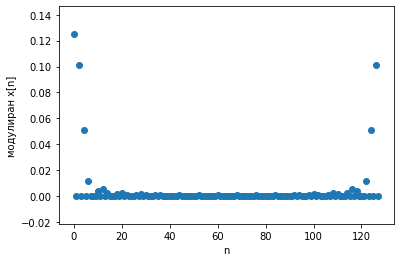

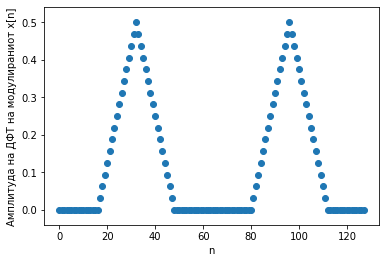

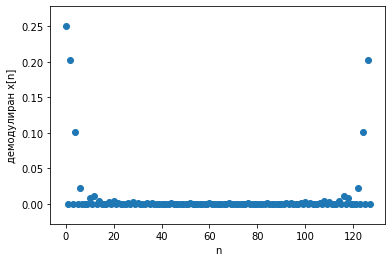

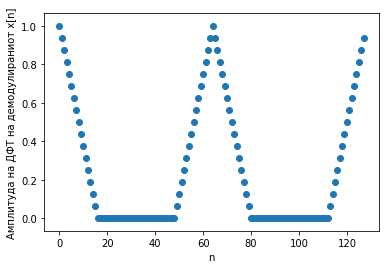

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#import math
import cmath
from scipy.fft import fft, ifft # gi zema samo ovie dve funkcii od bibliotekata


N = 128  # Должина на низата
n=np.asarray(list(range(0,N)))
Omega = 2.0 * np.pi / 10
Fi = 0
M = N // 8
Amplituda = np.zeros(N)
Amplituda[0] = 1
for i in range(M - 1):
    # Амплитудата е рамна
    # Amplituda[i + 1] = 1 # првите М примероци      
    # Amplituda[N - i - 1] = 1 # последните М примероци
    # Амплитудата е права, односно спектарот личи на триаголник
    Amplituda[i + 1] = (M - i - 1) / M # првите М примероци
    Amplituda[N - i - 1] = (M - i - 1) / M # последните М примероци    
Faza = np.zeros(N)
Spektar = np.zeros(N, dtype = np.complex_)
for i in range(N):
    Spektar[i] = Amplituda[i] * cmath.exp(1j * Faza[i])
    
# Ја правиме низата така што таа ќе има спектар кој личи на триаголник
# Затоа прво се прави спектарот, па потоа со обратна ДФТ се добива сигналот 
    
Signal = ifft(Spektar)    

# Цртање на сигналот
plt.figure() # нова слика
plt.scatter(n,abs(Signal))  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')

plt.ylabel('x[n]')
plt.show()

# Цртање на спектарот на сигналот
plt.figure() # нова слика
plt.scatter(n,Amplituda)  # abs(Niza) дава низа од апсолутни вредности
plt.xlabel('n')
plt.ylabel('Амплитуда на ДФТ на x[n]')
plt.show()


# Модулација
Omega_C = 2 * np.pi * 32 / N
#Omega_C = 2 * np.pi * 60 / N
Nositel = np.zeros(N)
for i in range(N):
    Nositel[i] = np.cos(Omega_C * i) 
Moduliran = np.zeros(N)
for i in range(N):
    Moduliran[i] = Signal[i] * Nositel[i] 

DFT = fft(Moduliran)    
    
# Цртање на модулираниот сигнал
plt.figure() 
plt.scatter(n,abs(Moduliran))  
plt.xlabel('n')
plt.ylabel('модулиран x[n]')
plt.show()

# Цртање на спектарот на модулираниот сигнал
plt.figure() 
plt.scatter(n,abs(DFT)) 
plt.xlabel('n')
plt.ylabel('Амплитуда на ДФТ на модулираниот x[n]')
plt.show()


# Демодулација
Nositel = np.zeros(N)
for i in range(N):
    Nositel[i] = np.cos(Omega_C * i) 
DeModuliran = np.zeros(N)
for i in range(N):
    DeModuliran[i] = 2 * Moduliran[i] * Nositel[i] 

DemDFT = fft(DeModuliran)    
    
# Цртање на демодулираниот сигнал (не е сеуште филтриран. За тоа понатака ќе учиме)
plt.figure() 
plt.scatter(n,abs(DeModuliran))  
plt.xlabel('n')
plt.ylabel('демодулиран x[n]')
plt.show()

# Цртање на спектарот на демодулираниот сигнал
plt.figure() 
plt.scatter(n,abs(DemDFT)) 
plt.xlabel('n')
plt.ylabel('Амплитуда на ДФТ на демодулираниот x[n]')
plt.show()
